[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

C:\Users\User\AppData\Local\Temp\ipykernel_11360\969598299.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df['cleaned_text'] = tweets_df['text'].apply(preprocess_text)
C:\Users\User\AppData\Local\Temp\ipykernel_11360\969598299.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df['navarasa_sentiment'] = tweets_df['cleaned_text'].apply(map_navarasa_sentiment)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score 

The accuracy score is - 
 0.8467741935483871
              precision    recall  f1-score   support

     adbhuta       0.89      0.84      0.86        67
   bhayanaka       0.00      0.00      0.00         5
    bibhatsa       0.50      0.07      0.12        14
       hasya       0.00      0.00      0.00         3
      karuna       0.83      0.36      0.50        14
      raudra       0.00      0.00      0.00         2
      shanta       0.82      0.99      0.90       162
   shringara       0.88      0.92      0.90        99
       veera       1.00      0.33      0.50         6

    accuracy                           0.85       372
   macro avg       0.55      0.39      0.42       372
weighted avg       0.82      0.85      0.82       372



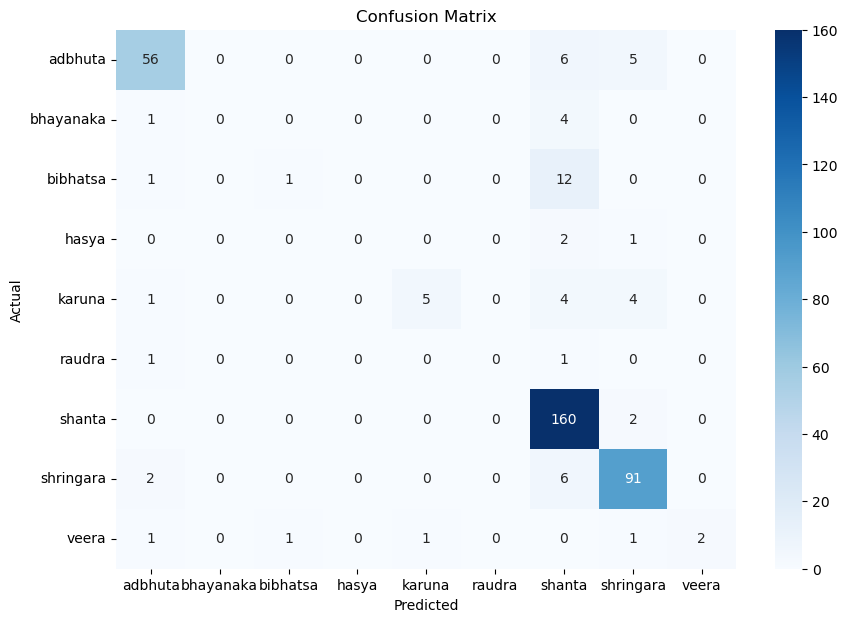

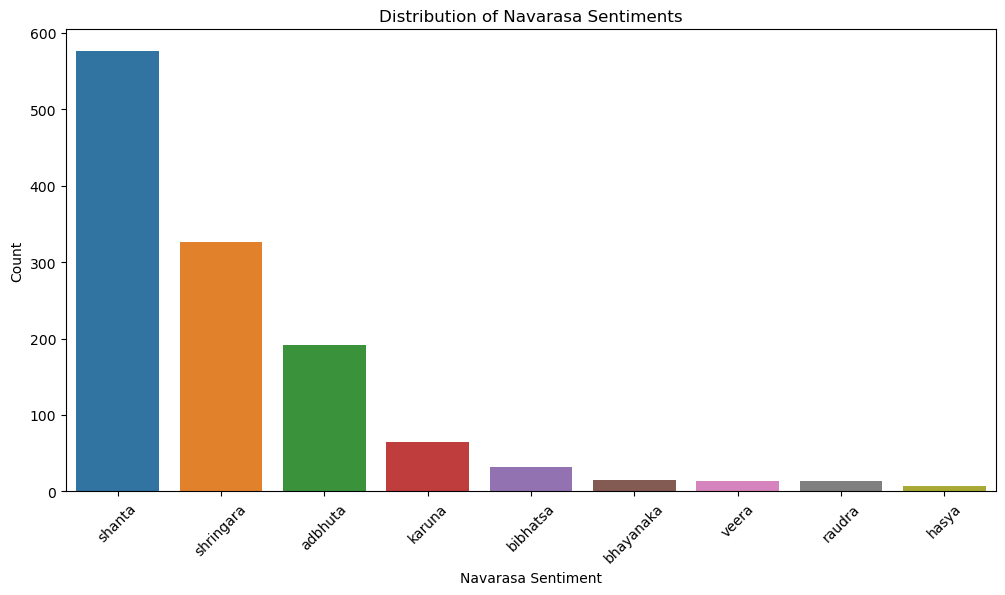

In [30]:
# Importing libraries

import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import pandas as pd

# Downloading Stopwords

nltk.download('stopwords')
nltk.download('punkt')

# Reading the dataset

Data = pd.read_csv('Tweets.csv')
Data.info()

# Filtering tweets with high confidence in sentiment

tweets_df = Data[Data['airline_sentiment_confidence'] >= 0.5]

# Defining navarasa emotions

navarasa_emotions = {
    'shringara': ['love', 'lovely', 'romantic', 'adoration', 'passionate', 'infatuation', 'tender', 'amorous', 'enchanted', 'affectionate', 'devotion', 'desire', 'fondness', 'attraction', 'charm'],
    'hasya': ['funny', 'hilarious', 'laugh', 'amusing', 'comical', 'witty', 'chuckle', 'giggle', 'jest', 'entertaining', 'jovial', 'mirth', 'playful', 'satirical', 'jocular'],
    'karuna': ['sad', 'sorrow', 'tear', 'grief', 'heartbroken', 'mourning', 'melancholy', 'distressed', 'lament', 'pity', 'regret', 'despair', 'woeful', 'forlorn', 'doleful'],
    'raudra': ['angry', 'furious', 'rage', 'wrath', 'enraged', 'fuming', 'hostile', 'vengeful', 'irate', 'outraged', 'infuriated', 'aggressive', 'tempestuous', 'resentful', 'incensed'],
    'veera': ['brave', 'courage', 'hero', 'valor', 'bold', 'gallant', 'fearless', 'daring', 'intrepid', 'dauntless', 'stalwart', 'resolute', 'adventurous', 'tenacious', 'unyielding'],
    'bhayanaka': ['fear', 'scared', 'terrified', 'frightened', 'panic', 'dread', 'horror', 'apprehensive', 'alarmed', 'petrified', 'nervous', 'uneasy', 'spooked', 'timid', 'trembling'],
    'bibhatsa': ['disgust', 'disgusting', 'gross', 'repulsion', 'nausea', 'abhorrence', 'revulsion', 'loathing', 'detest', 'repugnant', 'revolting', 'nauseating', 'foul', 'offensive', 'sickening'],
    'adbhuta': ['amazing', 'awe', 'wonder', 'astonished', 'marvel', 'astounded', 'amazement', 'fascination', 'bewildered', 'miraculous', 'incredible', 'stunned', 'surprised', 'mesmerized', 'extraordinary'],
    'shanta': ['calm', 'peaceful', 'serene', 'tranquil', 'relaxed', 'composed', 'placid', 'harmonious', 'quiet', 'still', 'content', 'untroubled', 'mild', 'gentle', 'restful']
}

#Preprocessing function

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text.lower())
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    text = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(text)

# Applying preprocessing

tweets_df['cleaned_text'] = tweets_df['text'].apply(preprocess_text)

# Defining navarasa mapping function

def map_navarasa_sentiment(text):
    for emotion, keywords in navarasa_emotions.items():
        if any(keyword in text for keyword in keywords):
            return emotion
    return 'other'

# Applying navarasa sentiment mapping

tweets_df['navarasa_sentiment'] = tweets_df['cleaned_text'].apply(map_navarasa_sentiment)

# Dropping rows with 'other' in navarasa sentiment column

tweets_df = tweets_df[tweets_df['navarasa_sentiment'] != 'other']

# Feature extraction using bag of words

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features =  3000)
X = cv.fit_transform(tweets_df['cleaned_text']).toarray()

Y = tweets_df['navarasa_sentiment']

# Splitting dataset into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

# Building multinomial Naive Bayes model

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, Y_train)

# Predicting test set results

Y_pred = model.predict(X_test)

# Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("The accuracy score is - \n", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting confusion matrix

import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize = (10,7))
sb.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = model.classes_, yticklabels = model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Distributing of Navarasa sentiments

plt.figure(figsize=(12, 6))
sb.countplot(x='navarasa_sentiment', data=tweets_df, order=tweets_df['navarasa_sentiment'].value_counts().index)
plt.xlabel('Navarasa Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Navarasa Sentiments')
plt.xticks(rotation=45)
plt.show()
